In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, linalg

In [2]:
from src.DataLoader import *
from src.Modelisation import *
from src.Visualisation import *

In [ ]:
cheminCSV = "./data/sport_clean.csv"
dfSport = loadData(cheminCSV)
print(dfSport.head())

Données chargées avec succès.
   Unnamed: 0  individu_id        date  activite  duree unite  poids_kg  \
0           0         1001  2025-01-01      velo  15.73   min      74.7   
1           1         1001  2025-01-02    course  56.67   min      74.7   
2           2         1001  2025-01-03    course  75.60   min      74.7   
3           3         1001  2025-01-04  natation  39.72   min      74.7   
4           4         1001  2025-01-05      velo  37.32   min      74.7   

   calories  
0     134.3  
1     731.2  
2     966.9  
3     437.7  
4     336.3  


In [15]:
infoDataFrame(dfSport)

Info DataFrame:
Taille: (4824, 8)

               dtype
Unnamed: 0     int64
individu_id    int64
date          object
activite      object
duree        float64
unite         object
poids_kg     float64
calories     float64

Statistiques descriptives:
        Unnamed: 0  individu_id        duree     poids_kg     calories
count  4824.000000  4824.000000  4824.000000  4824.000000  4824.000000
mean   2411.500000  1040.520937    49.061582    70.651026   522.661215
std    1392.713179    23.081237    17.175052     8.578073   228.928866
min       0.000000  1001.000000    10.000000    51.700000    37.800000
25%    1205.750000  1021.000000    37.247500    65.400000   366.275000
50%    2411.500000  1040.000000    48.215000    70.200000   492.450000
75%    3617.250000  1060.000000    60.000000    76.600000   647.975000
max    4823.000000  1080.000000   118.200000    96.100000  3603.100000



In [14]:
cheminCSV = "./data/travail_clean.csv"
dfTravail = loadData(cheminCSV)
print(dfTravail.head())

Données chargées avec succès.
   Unnamed: 0  individu_id        date  tasses_cafe  heures_travail  \
0           0         1001  2025-02-01            3             6.1   
1           1         1001  2025-02-02            3             6.4   
2           2         1001  2025-02-03            4             7.4   
3           3         1001  2025-02-04            3             9.6   
4           4         1001  2025-02-05            1             7.1   

   productivite  
0          62.6  
1          58.4  
2          58.0  
3          55.5  
4          45.5  


In [16]:
infoDataFrame(dfSport)

Info DataFrame:
Taille: (4824, 8)

               dtype
Unnamed: 0     int64
individu_id    int64
date          object
activite      object
duree        float64
unite         object
poids_kg     float64
calories     float64

Statistiques descriptives:
        Unnamed: 0  individu_id        duree     poids_kg     calories
count  4824.000000  4824.000000  4824.000000  4824.000000  4824.000000
mean   2411.500000  1040.520937    49.061582    70.651026   522.661215
std    1392.713179    23.081237    17.175052     8.578073   228.928866
min       0.000000  1001.000000    10.000000    51.700000    37.800000
25%    1205.750000  1021.000000    37.247500    65.400000   366.275000
50%    2411.500000  1040.000000    48.215000    70.200000   492.450000
75%    3617.250000  1060.000000    60.000000    76.600000   647.975000
max    4823.000000  1080.000000   118.200000    96.100000  3603.100000



In [10]:
activite = "velo"
res, X, Y = modeliserActiviteLineaire(dfSport, activite)
slope, intercept, r_value, p_value, std_er = res

# Résultats
print(f"Activité: {activite} -> y = {slope:.2f}x + {intercept:.2f}")
print(f"  R² = {r_value**2:.3f}")
print(f"  p-value: {p_value:.2f}")
print(f"  Erreur standard: {std_er:.2f} et t = a / std_er = {slope/std_er:.2f}")

Activité: velo -> y = 9.48x + -8.57
  R² = 0.729
  p-value: 0.00
  Erreur standard: 0.13 et t = a / std_er = 71.65


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaire_velo.png'


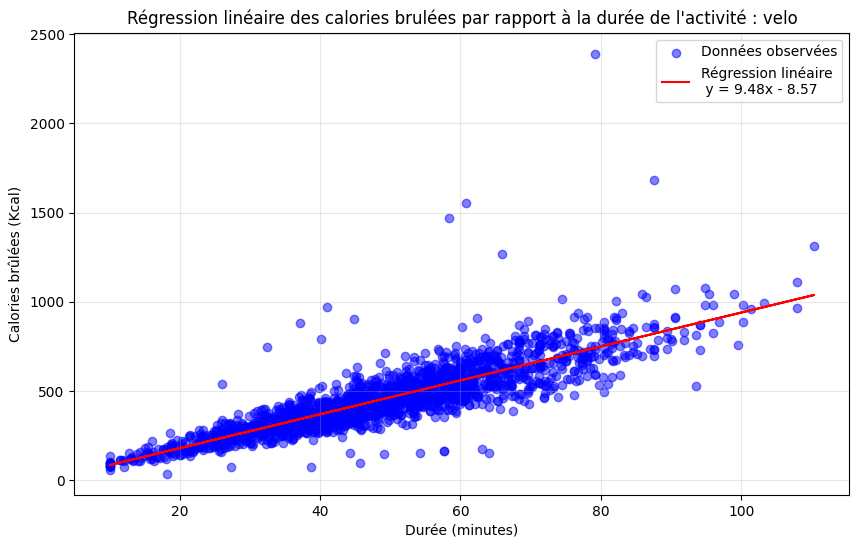

In [11]:
tracerRegression(X, Y, slope, intercept, activite, show=True)

In [12]:
res, X1, X2, Y = modeliserActiviteMultivariee(dfSport, activite)
beta, residuals, rank, s, k, rmse, r2 = res
a, b, c = beta

dfSportFiltre = dfSport[dfSport['activite'] == activite]
calMET = calculerCaloriesMET(activite, 60, 70)
calModele = calculerCaloriesModele(a, b, c, 60, 70)
ecartRelatif = 100 * abs(calModele - calMET) / calMET if calMET != 0 else 0.0

# Résultats
print(f"Activité: {activite} -> calories = {a:.2f}*duree + {b:.2f}*poids + {c:.2f}")
print(f"    R²: {r2:.3f})")
print(f"    Résidus: {residuals}")
print(f"    Erreur moyenne par prédiction: ±{rmse:.2f} calories soit {100*rmse/dfSportFiltre['calories'].mean():.2f}% d'erreur")
print(f"    Rang: {rank}")
print(f"    Singular values: {s}")
print(f"    Conditionnement (κ): {k:.2f}")
print(f"    Comparaison MET vs Modèle:")
print(f"        MET: {calMET:.2f} kcal")
print(f"        Modèle: {calModele:.2f} kcal")
print(f"        Ecart relatif: {ecartRelatif:.2f}%")

Activité: velo -> calories = 9.38*duree + 6.21*poids + -442.66
    R²: 0.807)
    Résidus: 13316815.636338029
    Erreur moyenne par prédiction: ±83.39 calories soit 18.23% d'erreur
    Rang: 3
    Singular values: [3803.62087002  641.86286351    5.03489521]
    Conditionnement (κ): 755.45
    Comparaison MET vs Modèle:
        MET: 551.25 kcal
        Modèle: 555.46 kcal
        Ecart relatif: 0.76%


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaireMultivariée_velo.png'


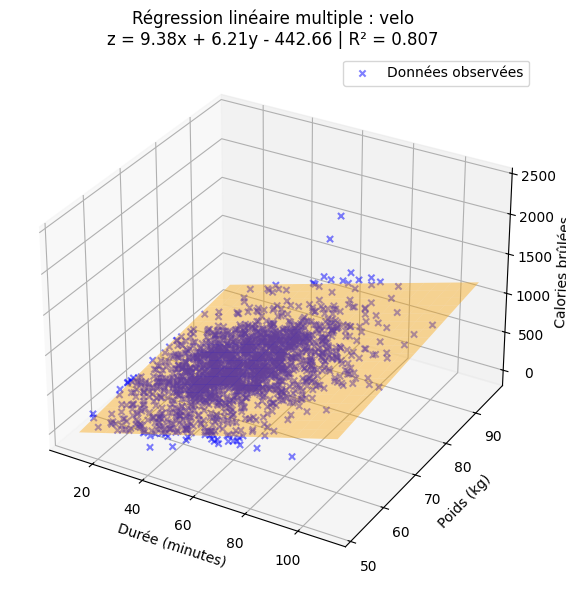

In [13]:
tracerRegression3D(X1, X2, Y, a, b, c, activite, r2, show=True)

In [17]:
res, X, Y = modeliserProductiviteLineaire(dfTravail)
slope, intercept, r_value, p_value, std_er = res

# Résultats
print(f"Productivité: -> y = {slope:.2f}x + {intercept:.2f}")
print(f"Maximum: Vu que c'est une droite, pas de maximum défini. On doit regarder le polynome degré 2.")
print(f"  R²: {r_value**2:.3f}")
print(f"  p-value: {p_value:.2f}")
print(f"  Erreur standard: {std_er:.2f} et t = a / std_er = {slope/std_er:.2f}")

Productivité: -> y = 4.31x + 45.23
Maximum: Vu que c'est une droite, pas de maximum défini. On doit regarder le polynome degré 2.
  R²: 0.485
  p-value: 0.00
  Erreur standard: 0.09 et t = a / std_er = 47.04


    Graphique de régression linéaire sauvegardé sous: '/app/resultats/RegressionLineaire_productivité.png'


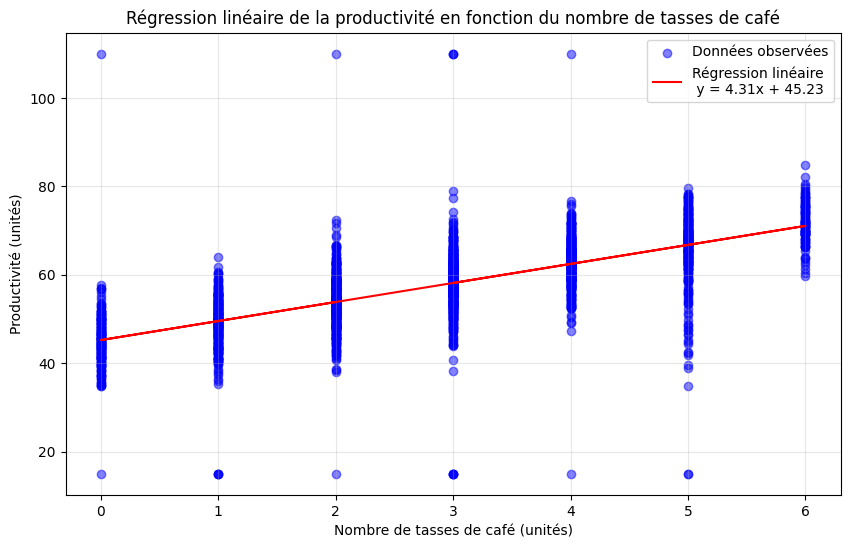

In [19]:
tracerRegression(X, Y, slope, intercept, "productivité", show=True)

In [20]:
a, b, c, max, r2 = modeliserProductivitePolynome(dfTravail)
print(f"Productivité: -> y = {a:.2f}x² + {b:.2f}x + {c:.2f}")
print(f"  Maximum: {max:.2f} tasses de café")
print(f"  R²: {r2:.3f}")
print(f"    Le coefficient a est négatif ({a:.2f}). Cela indique que la productivité augmente jusqu'à un maximum ({max:.2f}), puis diminue.\n    Dans le cas 0-6 tasses, on s'apparente à une droite croissante. Donc plus on boit de café, plus on est productif.")


Productivité: -> y = -0.17x² + 5.18x + 44.47
  Maximum: 15.64 tasses de café
  R²: 0.511
    Le coefficient a est négatif (-0.17). Cela indique que la productivité augmente jusqu'à un maximum (15.64), puis diminue.
    Dans le cas 0-6 tasses, on s'apparente à une droite croissante. Donc plus on boit de café, plus on est productif.


    Graphique de régression polynomiale sauvegardé sous: '/app/resultats/RegressionPolynomiale_productivite.png'


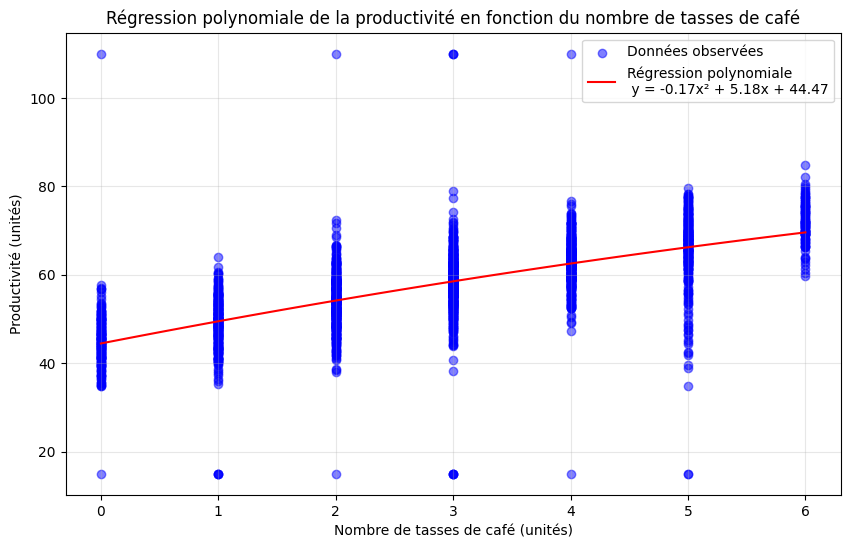

In [21]:
tracerPolynome(X, Y, np.array([a, b, c]), show=True)